In [ ]:
 !rm -rf LitImageCaptions
!git clone -q https://github.com/AndrewB330/LitImageCaptions
!cp LitImageCaptions/tokenizer.pickle tokenizer.pickle
!cp LitImageCaptions/model.h5 model.h5
!wget -nc -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!unzip -q -o Flickr8k_Dataset.zip

In [ ]:
from numpy import array
from pickle import load
from keras.models import Model
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.sequence import pad_sequences
from matplotlib.pyplot import imshow

import matplotlib.pyplot as plt

import random
import numpy as np

In [ ]:
def extract_features(filename):
	model = VGG16()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	image = load_img(filename, target_size=(224, 224))
	image = img_to_array(image)
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	image = preprocess_input(image)
	feature = model.predict(image, verbose=0)
	return feature

In [ ]:
def load_doc(filename):
	return open(filename, 'r').read()

def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	for line in doc.split('\n'):
		if len(line) < 1:
			continue
		dataset.append(line)
	return dataset

In [ ]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

def generate_desc(model, tokenizer, photo, max_length):
  in_text = 'startseq'
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length)
    yhat = model.predict([photo.reshape(1, -1),sequence], verbose=0)
    yhat = np.argmax(yhat)
    word = word_for_id(yhat, tokenizer)
    if word is None or word == 'endseq':
      break
    in_text += ' ' + word
  return in_text.replace('startseq', '')

In [ ]:
model = load_model('v4_model-val_loss2.451.h5')
tokenizer = load(open('v4_tokenizer.pickle', 'rb'))

In [ ]:
filename = 'LitImageCaptions/Flickr8k_text/Flickr_8k.testImages.txt'
ids = load_set(filename)

In [ ]:
def show(id):
  filename = id
  features = extract_features(filename)
  image = np.asarray(load_img(filename, target_size=(448, 448)))
  desc = generate_desc(model, tokenizer, features, 19)
  imshow(image)
  plt.plot()
  print(desc)

 a group of people standing around a crowd of people


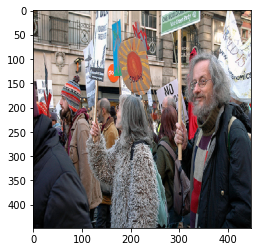

In [ ]:
show('Flicker8k_Dataset/' + random.choice(ids))

example4.png  a man and a woman standing in the snow


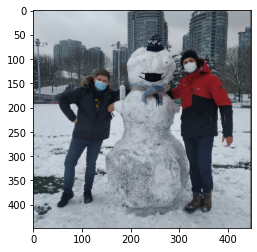

In [ ]:
show('example4.png')